In [2]:
import os
import numpy as np
import tensorflow_probability as tfp
from GPUtil import getFirstAvailable
tfd = tfp.distributions

os.environ["CUDA_VISIBLE_DEVICES"] = str(getFirstAvailable(
        order="load", maxLoad=10 ** -6, maxMemory=10 ** -3)[0])

In [3]:
from matplotlib import pyplot as plt

In [7]:
T = np.geomspace(0.0001, 10, 5000)

angles = np.linspace(0, np.pi, 5000)
borders = []
for t in T:
    dist = tfd.VonMisesFisher(concentration=[1/t], mean_direction=[[0,0,1]])
    samples = dist.sample(100000)[:,0,:]
    
    devs = np.arccos(np.sum(samples * np.array([0,0,1]), axis=1))
    for a in angles:
        if np.mean( devs < a ) >= 0.995:
            borders.append(a)
            break
            
borders = np.array(borders)

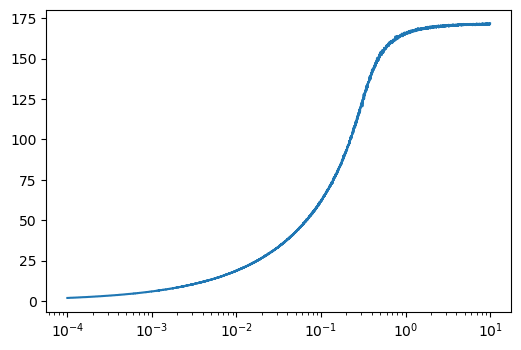

In [8]:
plt.figure(dpi=100)
plt.plot(T , borders/np.pi*180)
plt.xscale("log");

In [9]:
np.savez("effective_angle_lookup_995.npz", T=T, angle=borders)

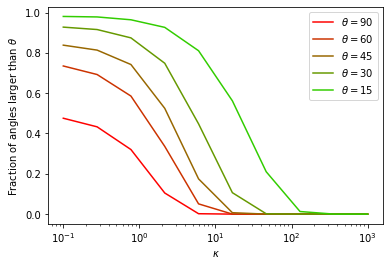

In [36]:
angles = [90,60,45,30,15]

larger_than = [[k, angle] for k in np.geomspace(0.1, 1000, 10) for angle in angles]
for t in larger_than:
    dist = tfd.VonMisesFisher(concentration=[t[0]], mean_direction=[[0,0,1]])
    samples = dist.sample(20000)[:,0,:]
    t.append(np.mean( np.arccos(np.sum(samples * np.array([0,0,1]), axis=1)) > np.pi/180 * t[1] ))
larger_than = np.array(larger_than)  

for i, angle in enumerate(angles):
    sel = larger_than[:, 1] == angle
    plt.plot(larger_than[sel, 0], larger_than[sel, 2], label=r"$\theta=$"+str(angle),
             color=plt.get_cmap("brg")(0.5 + 0.5*i/len(angles)))

plt.xscale("log");
plt.legend();
plt.xlabel(r"$\kappa$");
plt.ylabel(r"Fraction of angles larger than $\theta$");

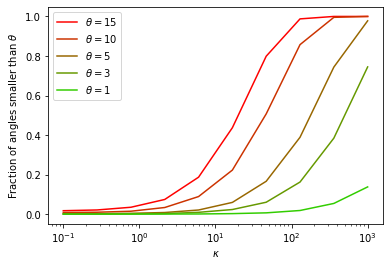

In [39]:
angles = [15, 10, 5, 3, 1]

smaller_than = [[k, angle] for k in np.geomspace(0.1, 1000, 10) for angle in angles]
for t in smaller_than:
    dist = tfd.VonMisesFisher(concentration=[t[0]], mean_direction=[[0,0,1]])
    samples = dist.sample(20000)[:,0,:]
    t.append(np.mean( np.arccos(np.sum(samples * np.array([0,0,1]), axis=1)) < np.pi/180 * t[1] ))
smaller_than = np.array(smaller_than)  

for i, angle in enumerate(angles):
    sel = smaller_than[:, 1] == angle
    plt.plot(smaller_than[sel, 0], smaller_than[sel, 2], label=r"$\theta=$"+str(angle),
             color=plt.get_cmap("brg")(0.5 + 0.5*i/len(angles)))

plt.xscale("log");
plt.legend();
plt.xlabel(r"$\kappa$");
plt.ylabel(r"Fraction of angles smaller than $\theta$");